In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 1

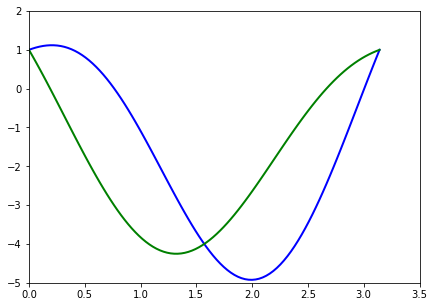

In [8]:
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([alpha,t0]), [a,b], atol=1e-10)[1,0]
        sol1 = odeint(f, np.array([alpha,t1]), [a,b], atol=1e-10)[1,0]
        t2 =  t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2


def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

X = np.linspace(0, np.pi, 100)
Y1 = solveSecant(ode, X, 0, np.pi, 1, 1, 0, 1, 40)

Y2 = solveSecant(ode, X, 0, np.pi, 1, 1, 0, -1, 40)

plt.figure(figsize=(7,5))
plt.xlim((0,3.5))
plt.ylim((-5,2))
plt.plot(X,Y1,'-b',lw=2)
plt.plot(X,Y2,'-g',lw=2)
plt.show()

# Problem 2

t not found


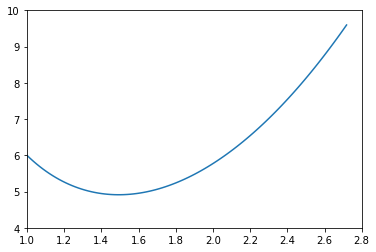

In [15]:
def find_t(f,a,b,alpha,beta,t0,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol = odeint(f, np.array([alpha,t0, 0,1]), [a,b], atol=1e-10)[1]
        y = sol[0]
        z = sol[2]
        t1=  t0 - (y - beta)/z
        t0 = t1
        i = i+1
    if i == maxI:
        print("t not found")
    return t1


def solveNewton(f,X,a,b,alpha,beta,t0,maxI):
    t = find_t(f,a,b,alpha,beta,t0,maxI)
    sol = odeint(f,np.array([alpha,t,0,1]), X,atol=1e-10)[:,0]
    return sol

def ode(y, x):
    return np.array([y[1], 3 + 2.*y[0]/(x**2), y[3], 2.*y[2]/(x**2)])

X = np.linspace(1, np.e, 100)
Y = solveNewton(ode,X,1,np.e,6, np.e**2 + 6./np.e, ((np.e**2 + 6./np.e) - 6)/(np.e - 1), 200)

plt.plot(X,Y)
plt.xlim((1,2.8))
plt.ylim((4,10))
plt.show()
